# What drives the success of a song? -- Capstone Assignment Raatib Tanvir

##### We would like to **determine what aspects of a song on Spotify contribute to its success**, particularly how much it is streamed and how frequently it shows up on popular playlists. The featured dataset, sourced from Kaggle user Solomon Ameh, denotes aspects of a song like "energy," "tempo," or "danceability" and scores them numerically, allowing us to relate them to a given song's commercial success on Spotify, which is scored numerically in the dataset by the metric "track popularity." By **relating these aspects of the data by using an appropriate machine learning model**, we can understand how they **contribute to the song's success**.

### Data Preparation


***General possible integrity issues***
* integrity issues - nans, numbered and non-numbered, duplicates
* considerations - useful vs. non-useful columns

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

songs = pd.read_csv('high_popularity_spotify_data.csv')
songs.info

<bound method DataFrame.info of       energy    tempo  danceability playlist_genre  loudness  liveness  \
0      0.592  157.969         0.521            pop    -7.777    0.1220   
1      0.507  104.978         0.747            pop   -10.171    0.1170   
2      0.808  108.548         0.554            pop    -4.169    0.1590   
3      0.910  112.966         0.670            pop    -4.070    0.3040   
4      0.783  149.027         0.777            pop    -4.477    0.3550   
...      ...      ...           ...            ...       ...       ...   
1681   0.422  124.357         0.573          latin    -7.621    0.1020   
1682   0.725  105.016         0.711          latin    -8.315    0.1100   
1683   0.809   99.005         0.724          latin    -5.022    0.0765   
1684   0.642   83.389         0.463          latin    -4.474    0.0686   
1685   0.890  126.881         0.645            pop    -4.985    0.3760   

      valence               track_artist  time_signature  speechiness  ...  \
0

***Check NaNs***

Result: The dataset is clear of any relevant NaNs

In [14]:
print(songs.isna().sum().sort_values(ascending=False))
#Results: no significant NaNs

track_album_name            1
energy                      0
analysis_url                0
type                        0
playlist_subgenre           0
id                          0
acousticness                0
duration_ms                 0
key                         0
mode                        0
track_album_id              0
instrumentalness            0
track_album_release_date    0
track_name                  0
track_id                    0
playlist_name               0
tempo                       0
uri                         0
track_href                  0
track_popularity            0
speechiness                 0
time_signature              0
track_artist                0
valence                     0
liveness                    0
loudness                    0
playlist_genre              0
danceability                0
playlist_id                 0
dtype: int64


***Deciding what to do***
* Remove duplicates
* Remove columns that do not pertain to our analysis:
    * ['track_popularity', 'track_href', 'uri', 'track_album_name', 'analysis_url', 'track_id', 'track_album_release_date', 'track_album_id', 'id', 'type', 'playlist_id']
* Determine columns that may be omitted during analysis:
    * For now, we will work with the numeric columns only
* Differentiate remaining columns based on numericness -- numeric vs. non-numeric
    * use is_numeric or select_dtypes(include=np.number)
* Determine the column that defines our predictor variable, which we will assign to "y" for our desired machine learning model.
    * track_popularity

# Determining and coding the evaluation metric

We want to determine what leads to a song's success. The dataset's "track popularity" column provides a score from 1-100 that denotes how successful a song was using metrics like stream count and occurrences in popular playlists. This score gives us a comprehensive understanding of how a song performs at a commercial level on Spotify. Thus, using it as our evaluation metric, and setting it to our "y" variable for analysis, will allow us to understand how other variables that pertain to each song contribute as predictors for the song's eventual success.

In [15]:
y = songs['track_popularity']
print(y)

0       100
1        97
2        93
3        81
4        98
       ... 
1681     76
1682     74
1683     69
1684     82
1685     69
Name: track_popularity, Length: 1686, dtype: int64


In [16]:
#Drop our y axis and drop all non-applicable columns
songs = songs.drop_duplicates()
s = songs.drop(['track_popularity', 'track_href', 'uri', 'track_album_name', 'analysis_url', 'track_id', 'track_album_release_date', 'track_album_id', 'id', 'type', 'playlist_id'], axis=1)
#Remaining non-numerics: 'playlist_genre', 'track_artist', 'playlist_name', 'playlist_subgenre'

#28 columns is now 17 columns
# s.info

In [17]:
#Numeric columns only --> 12 columns
s_num = s.select_dtypes(include=np.number)
# s_num.info

### Linear Regression Model -- all numeric features

For the sake of our initial analysis, we have decided to use only the numeric columns as features. The numeric columns make up a majority of our applicable 

LinearRegression(fit_intercept=False)
[ 1.70804338e+01  6.92229956e-02  1.58594933e+01 -7.34487966e-01
  5.26154458e+00 -2.98965542e+00  8.89707738e+00 -1.14797655e+01
 -4.97794667e+00  1.08913818e+00  1.56482280e-01  1.89437495e-05
  8.45134218e+00]
60.170621044012336
            features  coefficents
0             energy    17.080434
1              tempo     0.069223
2       danceability    15.859493
3           loudness    -0.734488
4           liveness     5.261545
5            valence    -2.989655
6     time_signature     8.897077
7        speechiness   -11.479766
8   instrumentalness    -4.977947
9               mode     1.089138
10               key     0.156482
11       duration_ms     0.000019
12      acousticness     8.451342


Text(0.5, 1.0, 'Results of Linear Regression on Numeric Track Features vs. Track Popularity')

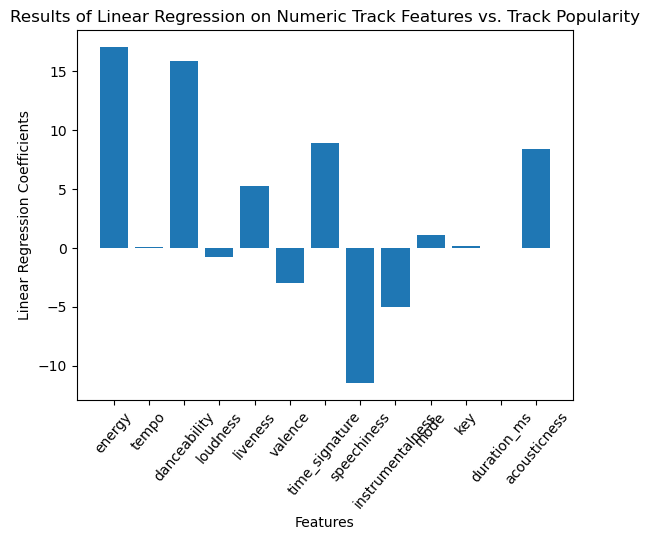

In [18]:
###Linear regression
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


X = pd.get_dummies(s_num)
all_features_linreg = LinearRegression(fit_intercept=False).fit(X, y)
linreg_mse = mean_squared_error(all_features_linreg.predict(X), y)




print(all_features_linreg)
print(all_features_linreg.coef_)
print(linreg_mse)

feature_names = (list(X.columns))
linreg_df = pd.DataFrame({'features': feature_names, 'coefficents': all_features_linreg.coef_})
print(linreg_df)


plt.bar(feature_names, all_features_linreg.coef_)
plt.xlabel('Features')
plt.xticks(rotation=50)
plt.ylabel('Linear Regression Coefficients')
plt.title('Results of Linear Regression on Numeric Track Features vs. Track Popularity')



                  coefficents
features                     
energy              17.080434
danceability        15.859493
time_signature       8.897077
acousticness         8.451342
liveness             5.261545
mode                 1.089138
key                  0.156482
tempo                0.069223
duration_ms          0.000019
loudness            -0.734488
valence             -2.989655
instrumentalness    -4.977947
speechiness        -11.479766


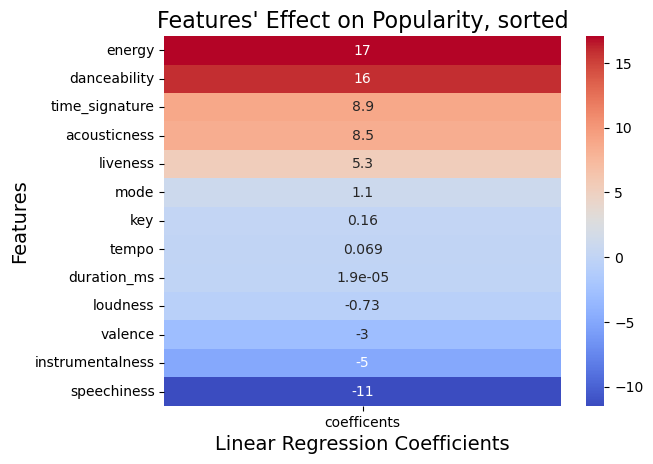

In [19]:
df = linreg_df.set_index('features')
df = df.sort_values(by=["coefficents"], ascending=False)
print(df)


ax = sns.heatmap(df, annot=True, cmap='coolwarm')
ax.set_xlabel("Linear Regression Coefficients", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
plt.title("Features' Effect on Popularity, sorted", fontsize=16) # Add a main title
plt.show()

## Analysis
Initial analysis of our linear regression coefficients hints us to the following conclusions, which we may further confirm by choosing different machine learning models and further editing our data.


### We can sum up our findings to three big takeaways:

### 1) Danceability, time_signature, and speechiness are major indicators of song success. 
##### Specifically, **higher danceability has a very strong likelyhood to increase the virality** of a song, as is a **higher time signature**. This implies that listeners prefer faster, more upbeat songs. Likewise, more **"speechiness" makes a song much, much less likely** to succeed.




### 2) Liveness and acousticness are other significant indicators of song success.
##### Live and acoustic versions of songs can perform quite successfully. They are not as success-producing as danceability or time signature, but they are still strongly positively linked to virality. This implies that **users do prefer the occassional live or acoustic version of a song, perhaps preferring an authentic presence** to the track they are listening to!

### 3) The remaining numeric features are insignificant in predicting the success of a song.
##### Our analysis implies a lack of relationship between the following features and the success of a song:
##### tempo, loudness, valence, instrumentalness, mode, key, duration_ms

##### a) Tempo, mode, key, and valence are all relatively specific measures that may evoke a variety of emotions depending on how they are configured for a track. Given how widespread different tempos, keys, and so on are implemented by artists, it is unsurprising that the most successful tracks may come from a vast range of these configurations. Still, it is interesting to find out that **specific keys, tempos and so on -- which help indicate the mood and intention of a song -- don't predict success. Listeners are always looking for a variety of experiences!**

##### b) Similarly, **duration of a song doesn't predict success -- listeners will not discriminate against long or short songs!** We can do further analysis to see if our data truly includes songs that are varying in length, or if perhaps our contenders are all of similar length in the first place. Maybe measuring in milliseconds is keeping us from finding out more, so changing the scale with which this is measured could help us -- later, we may convert milliseconds to seconds and reassess.

# Next model - Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV

In [21]:
# only examine relevant features from LinReg
s_dt = s_num.drop(['tempo','loudness','valence','key','duration_ms','mode'],axis=1)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(s_dt, y, random_state = 42)

In [23]:
dtree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
depth_1 = dtree.get_depth()
train_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)

print(f'Training Accuracy: {train_acc: .2f}')
print(f'Test Accuracy: {test_acc: .2f}')
print(f'Depth of tree: {depth_1}')

Training Accuracy:  0.99
Test Accuracy:  0.27
Depth of tree: 31


## Troubleshooting Overfitting

### We see a very high training accuracy and very low test accuracy. Let's see if we can fine tune the data or the tree to come out with better test accuracy. What may be happening here is overfitting, so we can check some hyperparameters to mitigate the effect.

### Min samples example

In [24]:
dtree_samples = DecisionTreeClassifier(min_samples_split = 0.1, random_state = 42).fit(X_train,y_train)
depth_2 = dtree_samples.get_depth()
samples_train_acc = dtree_samples.score(X_train, y_train)
samples_test_acc = dtree_samples.score(X_test, y_test)


print(f'Training Accuracy: {samples_train_acc: .2f}')
print(f'Trest Accuracy: {samples_test_acc: .2f}')
print(f'Depth of tree: {depth_2}')

Training Accuracy:  0.19
Trest Accuracy:  0.06
Depth of tree: 17


### Max depth example

In [25]:
depth_tree = DecisionTreeClassifier(max_depth = 20, random_state = 42).fit(X_train,y_train)
depth_train_acc = depth_tree.score(X_train, y_train)
depth_test_acc = depth_tree.score(X_test, y_test)

### Answer Check
print(f'Training Accuracy: {depth_train_acc: .2f}')
print(f'Test Accuracy: {depth_test_acc: .2f}')

Training Accuracy:  0.80
Test Accuracy:  0.22


### Min impurity example

In [26]:
imp_tree = DecisionTreeClassifier(min_impurity_decrease = 0.01, random_state = 42).fit(X_train, y_train)
imp_train_acc = imp_tree.score(X_train, y_train)
imp_test_acc = imp_tree.score(X_test, y_test)
depth_4 = imp_tree.get_depth()

### Answer Check
print(f'Training Accuracy: {imp_train_acc: .2f}')
print(f'Trest Accuracy: {imp_test_acc: .2f}')
print(f'Depth of tree: {depth_4}')

Training Accuracy:  0.08
Trest Accuracy:  0.06
Depth of tree: 0


## Grid search

In [27]:
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [10, 15, 20, 25, 30],
         'min_samples_split': [0.1, 0.2, 0.05]}

In [28]:
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)
grid_train_acc = grid.score(X_train,y_train)
grid_test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_

### Answer Check
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Test Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')

Training Accuracy:  0.08
Test Accuracy:  0.06
Best parameters of tree: {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.1}


In [29]:
params = {'max_depth': [10, 15, 20, 25, 30],}

In [30]:
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)
grid_train_acc = grid.score(X_train,y_train)
grid_test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_

### Answer Check
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Test Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')

Training Accuracy:  0.99
Test Accuracy:  0.28
Best parameters of tree: {'max_depth': 30}


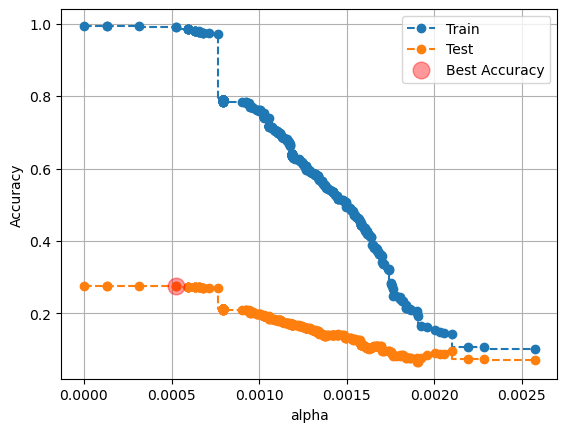

In [31]:
### GRADED

train_accs = []
test_accs = []
dtree = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
path = dtree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas
impurities = path.impurities

# YOUR CODE HERE
for i in ccp_alphas[:-1]:
    dtree = DecisionTreeClassifier(random_state = 42, ccp_alpha = i).fit(X_train, y_train)
    train_accs.append(dtree.score(X_train,y_train))
    test_accs.append(dtree.score(X_test,y_test))

# # Answer check
plt.step(ccp_alphas[:-2], train_accs[:-1], '--o', label = 'Train')
plt.step(ccp_alphas[:-2], test_accs[:-1], '--o', label = 'Test')
plt.plot(ccp_alphas[np.argmax(test_accs)], max(test_accs), 'ro', markersize = 12, alpha = 0.4, label = 'Best Accuracy')
plt.legend()
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Accuracy');

### Tuning the decision tree model does not appear to be working. After refining the data to use less features in order to mitigate noise, it appears that there may be an issue with the model we are trying to use. Let's try a random forest, and see if it has a better time fitting the data than single decision tree models do.

In [32]:
dtree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
depth_1 = dtree.get_depth()
train_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)

print(f'Training Accuracy: {train_acc: .2f}')
print(f'Test Accuracy: {test_acc: .2f}')
print(f'Depth of tree: {depth_1}')

Training Accuracy:  0.99
Test Accuracy:  0.27
Depth of tree: 31


## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
forest_1 = RandomForestClassifier(random_state = 42, oob_score = True).fit(s_num, y)

score = forest_1.oob_score_

### ANSWER CHECK
print(score)

0.31613285883748515


## Troubleshooting Overfitting in our Classifier -- Tuning Hyperparameters

### Number of trees

In [35]:
n_trees = [1, 10, 100, 500, 1000, 2000]

oob_scores = []
for i in n_trees:
    forest = RandomForestClassifier(random_state = 42, oob_score = True, n_estimators = i).fit(X,y)
    oob_scores.append(forest.oob_score_)


### ANSWER CHECK
print(oob_scores)

[0.14056939501779359, 0.28291814946619215, 0.31613285883748515, 0.3250296559905101, 0.3291814946619217, 0.32977461447212336]


### Depth

In [36]:
depths = [3,5,10, 20, 30, 40, 50, None]

depth_oobs = []

    
# YOUR CODE HERE
for d in depths:
    forest1 = RandomForestClassifier(random_state = 42,oob_score = True, n_estimators = 200, max_depth = d).fit(X,y)
    depth_oobs.append(forest1.oob_score_)


print(depth_oobs)


[0.09193357058125741, 0.12514827995255043, 0.269276393831554, 0.31791221826809013, 0.31613285883748515, 0.3190984578884935, 0.3202846975088968, 0.3202846975088968]


### Min samples split

In [37]:
samples = [2, 3, 4, 5]

sample_oobs = []

    
# YOUR CODE HERE
for s in samples:
    forest1 = RandomForestClassifier(random_state = 42,oob_score = True, n_estimators = 200, max_depth = 20,  min_samples_split = s).fit(X,y)
    sample_oobs.append(forest1.oob_score_)

print(sample_oobs)


[0.31791221826809013, 0.3190984578884935, 0.32443653618030843, 0.3238434163701068]


### Min samples leaf

In [38]:
samples = [1, 2, 3, 4, 5]

sample_oobs = []

    
# YOUR CODE HERE
for s in samples:
    forest1 = RandomForestClassifier(random_state = 42,oob_score = True, n_estimators = 200, max_depth = 20,  min_samples_split = 3, min_samples_leaf = s).fit(X,y)
    sample_oobs.append(forest1.oob_score_)

print(sample_oobs)


[0.3190984578884935, 0.330367734282325, 0.32265717674970346, 0.3143534994068802, 0.30604982206405695]


In [39]:
new_forest =RandomForestClassifier(random_state = 42,oob_score = True, n_estimators = 200, max_depth = 20,  min_samples_split = 3, min_samples_leaf = 2).fit(X,y)

print(new_forest.oob_score_)

0.330367734282325


In [40]:
samples = [2, 3, 4, 5]

sample_oobs = []

    
# YOUR CODE HERE
for s in samples:
    forest1 = RandomForestClassifier(random_state = 42,oob_score = True, n_estimators = 200, max_depth = 20,  min_samples_split = s).fit(X,y)
    sample_oobs.append(forest1.oob_score_)

print(sample_oobs)


[0.31791221826809013, 0.3190984578884935, 0.32443653618030843, 0.3238434163701068]


## Random Forest Regressor

#### Let's use a regressor for our numerical data and see if there's a significant improvement.

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
forest_r = RandomForestRegressor(random_state = 42, oob_score = True).fit(s_num, y)

score = forest_1.oob_score_

### ANSWER CHECK
print(score)

0.31613285883748515


In [43]:
n_trees = [1, 10, 100, 500, 1000, 2000]

oob_scores = []
for i in n_trees:
    forest = RandomForestRegressor(random_state = 42, oob_score = True, n_estimators = i).fit(X,y)
    oob_scores.append(forest.oob_score_)


### ANSWER CHECK
print(oob_scores)
#n = 500

[-100.73260738432086, -1.243681879633117, 0.40091710026806415, 0.4111622116656142, 0.41636179563153186, 0.41790756449967625]


In [44]:
depths = [3,5,10, 20, 30, 40, 50, None]

depth_oobs = []

    
# YOUR CODE HERE
for d in depths:
    forest1 = RandomForestRegressor(random_state = 42,oob_score = True, n_estimators = 500, max_depth = d).fit(X,y)
    depth_oobs.append(forest1.oob_score_)

#d = 30

print(depth_oobs)

[0.07023675977418709, 0.1343579163466685, 0.304139556410859, 0.4119009133401992, 0.4112706021221144, 0.4111622116656142, 0.4111622116656142, 0.4111622116656142]


In [45]:
samples = [2, 3, 4, 5]

sample_oobs = []

    
# YOUR CODE HERE
for s in samples:
    forest1 = RandomForestRegressor(random_state = 42,oob_score = True, n_estimators = 500, max_depth = 30,  min_samples_split = s).fit(X,y)
    sample_oobs.append(forest1.oob_score_)

print(sample_oobs)
#2


[0.4112706021221144, 0.40957695164611374, 0.4027437783169473, 0.39573699261034734]


In [46]:
samples = [1, 2, 3, 4, 5]

sample_oobs = []

    
# YOUR CODE HERE
for s in samples:
    forest1 = RandomForestRegressor(random_state = 42,oob_score = True, n_estimators = 500, max_depth = 30,  min_samples_split = 2, min_samples_leaf = s).fit(X,y)
    sample_oobs.append(forest1.oob_score_)

print(sample_oobs)


[0.4112706021221144, 0.38757301850233983, 0.3652236603788749, 0.3352683088965668, 0.31303463452514446]


In [47]:
new_forest_r =RandomForestRegressor(random_state = 42,oob_score = True, n_estimators = 500, max_depth = 30,  min_samples_split = 2, min_samples_leaf = 1).fit(X,y)

print(new_forest_r.oob_score_)

0.4112706021221144


### So far, we've gotten a marginal increase in test accuracy. Let's try another model and see if we can do better than this.

# Neural Network (3 layers)
#### While a regression problem on tabular data tends to call for a lower number of nodes, such an application was leading to very low training and validation accuracies.

In [48]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

## Without Scaling
### Let's test without scaling data before it interacts with our input layer

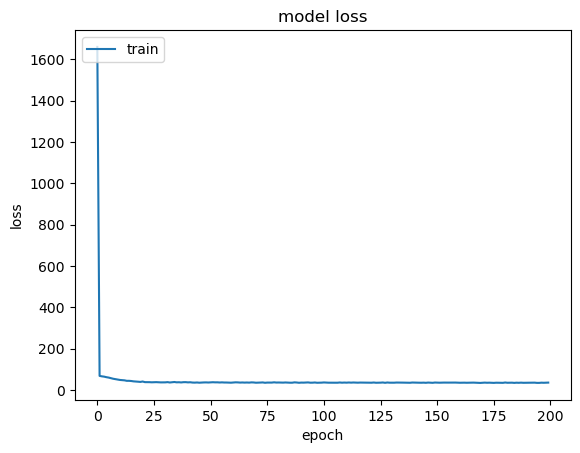

In [49]:
model = Sequential([
    # Input layer: input_shape matches the number of features
    layers.Dense(200, activation='relu', input_shape=(7,)), 
    
    # Hidden layer
    layers.Dense(100, activation='relu'),
    
    # Output layer: 
    # Use 1 unit + 'sigmoid' for binary classification
    # Use 'softmax' for multi-class classification
    # Use 1 unit + 'linear' for regression
    layers.Dense(1, activation='linear') 
])
np.random.seed(42)
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
# history = model.fit(s_dt,y, epochs = 200, batch_size = 10, verbose = 2)
history = model.fit(s_dt,y, epochs = 200, batch_size = 10, verbose = 0)




plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


#### Loss is not decreasing past a value of about 33.

### With StandardScaler

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler# Normalize data
scaler = StandardScaler()
X = s_dt
X = scaler.fit_transform(X)# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


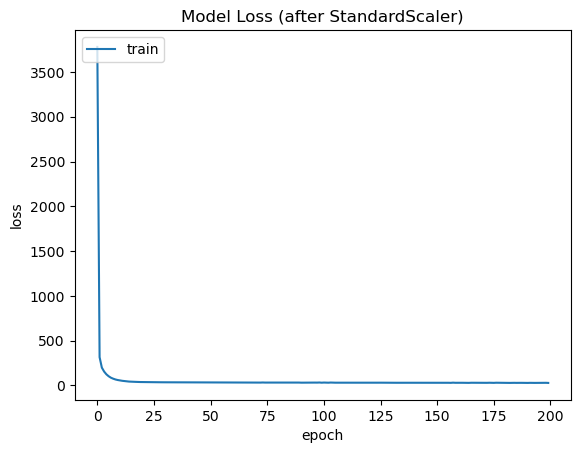

In [51]:
model = Sequential([
    # Input layer: input_shape matches the number of features
    layers.Dense(200, activation='relu', input_shape=(7,)), 
    
    # Hidden layer
    layers.Dense(100, activation='relu'),
    
    # Output layer: 
    # Use 1 unit + 'sigmoid' for binary classification
    # Use 'softmax' for multi-class classification
    # Use 1 unit + 'linear' for regression
    layers.Dense(1, activation='linear') 
])
np.random.seed(42)
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
# history = model.fit(X,y, epochs = 200, batch_size = 20, verbose = 2)
history = model.fit(X,y, epochs = 200, batch_size = 20, verbose = 0)



plt.plot(history.history['loss'])
plt.title('Model Loss (after StandardScaler)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### Loss is not decreasing past a value of about 27, indicating that the model cannot adequately train onto the data.

## Adding more layers to reduce loss and adequately train on the data


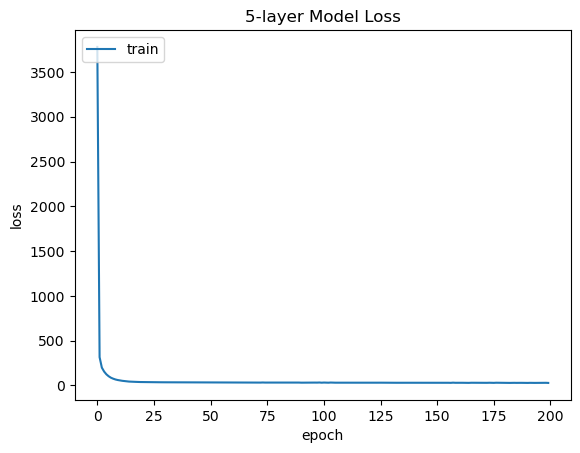

In [52]:
model = Sequential([
    # Input layer: input_shape matches the number of features
    layers.Dense(200, activation='relu', input_shape=(7,)), 
    
    # Hidden layer
    layers.Dense(100, activation='relu'),

    layers.Dense(200, activation='relu'),

    layers.Dense(100, activation='relu'),
    
    layers.Dense(1, activation='linear') 
])
np.random.seed(42)
#Change learning rate to 0.01

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae','mape'])
# history = model.fit(X,y, epochs = 500, batch_size = 20, verbose = 2)


plt.plot(history.history['loss'])
plt.title('5-layer Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### We note that the loss is consistently reducing, suggesting we can continue training with greater epochs. At the 500th epoch, loss had a value of about 7.
#### Note: default learning rate is 0.001 -- we may consider increasing this.

### Change learning rate to 0.01

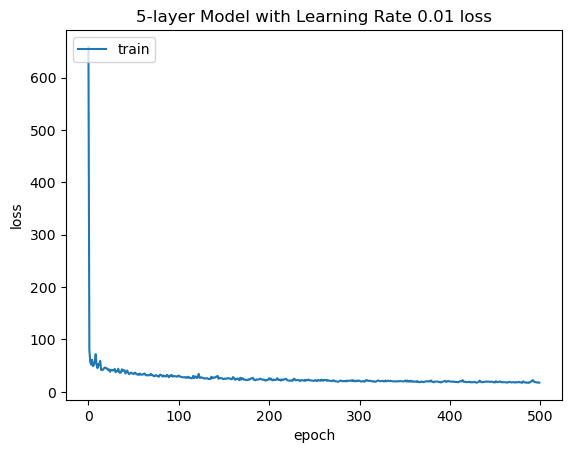

In [53]:
model_lr = Sequential([
    # Input layer: input_shape matches the number of features
    layers.Dense(200, activation='relu', input_shape=(7,)), 
    
    # Hidden layer
    layers.Dense(100, activation='relu'),

    layers.Dense(200, activation='relu'),

    layers.Dense(100, activation='relu'),
    
    layers.Dense(1, activation='linear') 
])
np.random.seed(42)
#Change learning rate to 0.01
optimizer = tf.keras.optimizers.Adam(0.001)
optimizer.learning_rate.assign(0.01)
model_lr.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae','mape'])
# history = model_lr.fit(X,y, epochs = 500, batch_size = 20, verbose = 2)
history = model_lr.fit(X,y, epochs = 500, batch_size = 20, verbose = 0)

plt.plot(history.history['loss'])
plt.title('5-layer Model with Learning Rate 0.01 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

##### Loss decreases to a value of about 19 and stops decreasing. Since performance worsened upon speeding up learning rate, let's use the original 5-layer network with the default learning rate, and increase the epochs until the loss is sufficiently low.

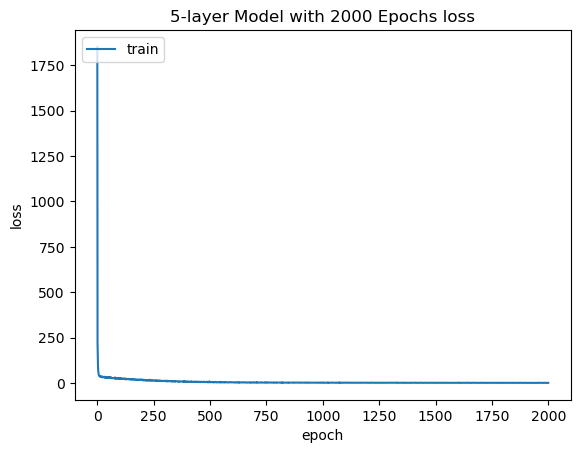

In [54]:
model = Sequential([
    # Input layer: input_shape matches the number of features
    layers.Dense(200, activation='relu', input_shape=(7,)), 
    
    # Hidden layer
    layers.Dense(100, activation='relu'),

    layers.Dense(200, activation='relu'),

    layers.Dense(100, activation='relu'),
    
    layers.Dense(1, activation='linear') 
])
np.random.seed(42)


model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae','mape'])
# history = model.fit(X,y, epochs = 2000, batch_size = 20, verbose = 2)
history = model.fit(X,y, epochs = 2000, batch_size = 20, verbose = 0)

plt.plot(history.history['loss'])
plt.title('5-layer Model with 2000 Epochs loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

##### Loss decreases past a value of 1. Since the loss is sufficiently low with this model, we can turn to validation to see how the model performs when predicting test data.

## Validation

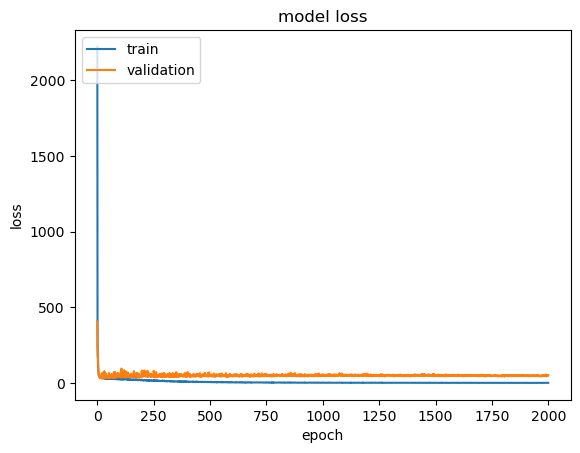

In [55]:
model = Sequential([
    # Input layer: input_shape matches the number of features
    layers.Dense(200, activation='relu', input_shape=(7,)), 
    
    # Hidden layer
    layers.Dense(100, activation='relu'),

    layers.Dense(200, activation='relu'),

    layers.Dense(100, activation='relu'),
    
    layers.Dense(1, activation='linear') 
])
np.random.seed(42)
#Change learning rate to 0.01

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae','mape'])
# history = model.fit(X,y, epochs = 2000, batch_size = 20, verbose = 2, validation_split = 0.2)
history = model.fit(X,y, epochs = 2000, batch_size = 20, verbose = 0, validation_split = 0.2)


# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### While the loss decreases to about 1, indicating that it has trained on the data well, our validation loss is still quite high, returning a value of at least 30 to 40 at the end of the training. Our validation loss fails to decrease at a certain point, indicating that the model is overfitted, likely because it is too complex.

## Model regularization
#### We must address the discrepancy between loss and validation loss by lowering the complexity of the model

### Reducing nodes per layer

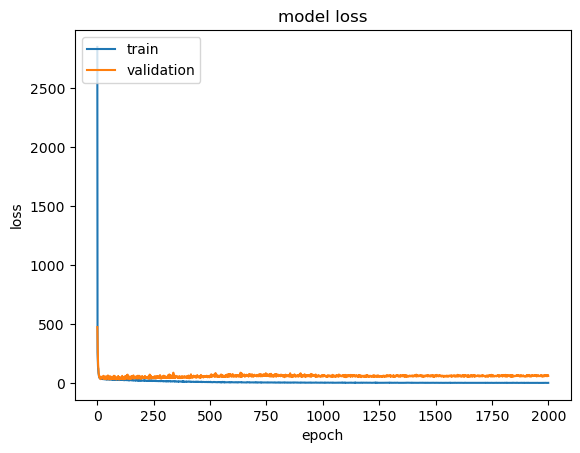

In [56]:
model = Sequential([
    # Input layer: input_shape matches the number of features
    layers.Dense(200, activation='relu', input_shape=(7,)), 
    
    # Hidden layer
    layers.Dense(100, activation='relu'),

    layers.Dense(100, activation='relu'),

    layers.Dense(50, activation='relu'),
    
    layers.Dense(1, activation='linear') 
])
np.random.seed(42)
#Change learning rate to 0.01

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae','mape'])
# history = model.fit(X,y, epochs = 2000, batch_size = 20, verbose = 2, validation_split = 0.2)
history = model.fit(X,y, epochs = 2000, batch_size = 20, verbose = 0, validation_split = 0.2)


# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Loss decreases to about 1. Val_loss decreases to about 60 to 70.

### Introducing regularizers

In [57]:
from tensorflow.keras import regularizers

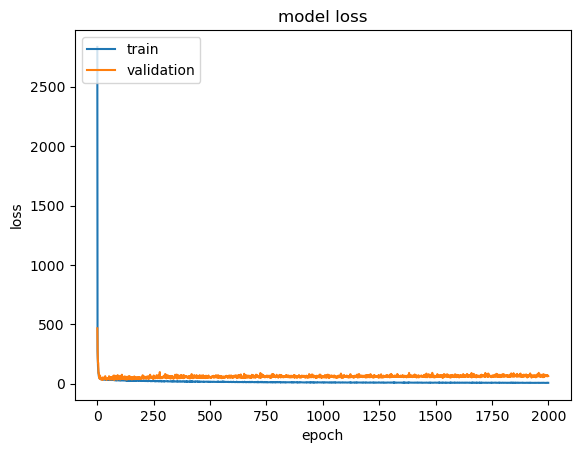

In [58]:
model = Sequential([
    # Input layer: input_shape matches the number of features
    layers.Dense(200, activation='relu', input_shape=(7,)), 
    
    # Hidden layer
    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    
    layers.Dense(1, activation='linear') 
])
np.random.seed(42)
#Change learning rate to 0.01

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae','mape'])
# history = model.fit(X,y, epochs = 2000, batch_size = 20, verbose = 2, validation_split = 0.2)
history = model.fit(X,y, epochs = 2000, batch_size = 20, verbose = 0, validation_split = 0.2)


# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Loss converges to 5, val_loss decreases to about 60 to 70. This is not an improvement.

### Introducing dropout layers

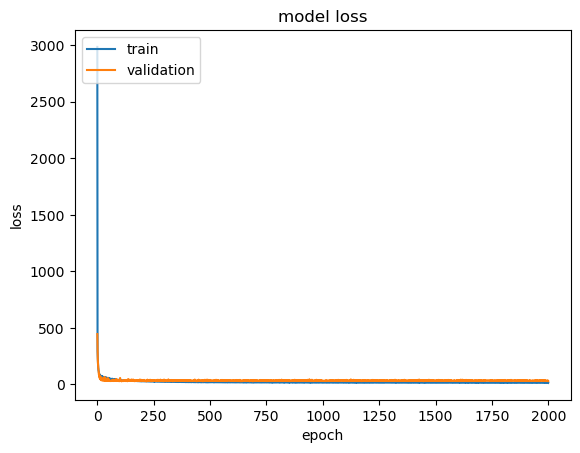

In [59]:
model = Sequential([
    # Input layer: input_shape matches the number of features
    layers.Dense(200, activation='relu', input_shape=(7,)), 
    
    layers.Dropout(0.2),
    # Hidden layer
    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    layers.Dropout(0.2),

    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    
    layers.Dense(1, activation='linear') 
])
np.random.seed(42)


model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae','mape'])
# history = model.fit(X,y, epochs = 2000, batch_size = 20, verbose = 2, validation_split = 0.2)
history = model.fit(X,y, epochs = 2000, batch_size = 20, verbose = 0, validation_split = 0.2)


# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Loss stops decreasing around 15, val_loss stop decreasing around 35. The val_loss has improved but the loss no longer decreases to 1, indicating lower quality training.

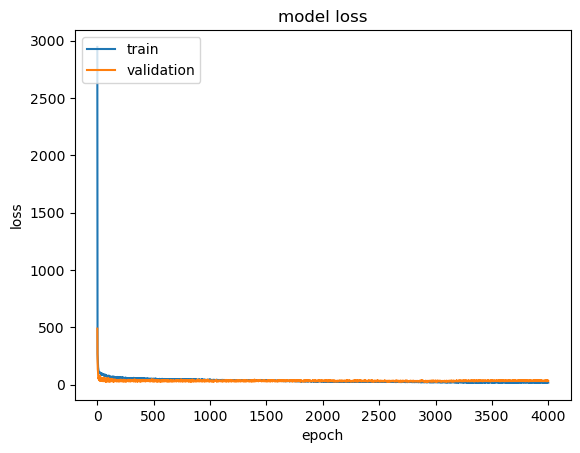

In [60]:
model = Sequential([
    # Input layer: input_shape matches the number of features
    layers.Dense(200, activation='relu', input_shape=(7,)), 
    
    layers.Dropout(0.2),
    # Hidden layer
    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    layers.Dropout(0.2),

    layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    layers.Dropout(0.1),
    
    layers.Dense(1, activation='linear') 
])
np.random.seed(42)
#Change learning rate to 0.01

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae','mape'])
# history = model.fit(X,y, epochs = 4000, batch_size = 20, verbose = 2, validation_split = 0.2)
history = model.fit(X,y, epochs = 4000, batch_size = 20, verbose = 0, validation_split = 0.2)


# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Loss stops decreasing around 15, val_loss converges around 35. This is a similar result as the last iteration of the model.

### Conclusions

##### We are reaching a point where validation loss is failing to converge and next steps to regularize the model are ambiguous or may require additional resources. It is fair to conclude that the current model may need a different architecture or that the data is not conducive to this type of model.

##### Frankly speaking, this model is VERY complicated for the problem it is trying to solve. This is tabular data with 7 numerical features predicting another numerical value. It is a task that regression analysis can perform, and in the case of neural networks, apparently involves a relatively low number of layers with a relatively low number of nodes. The reasons why the initial attempts with such an architecture failed to demonstrate high accuracy are still relatively mysterious to me.

##### From a business perspective, it is unwise to continue delving into the given model's characteristics without more research on similar problems or the insight of a more experienced colleague.

### Thank you for assessing my Capstone Assignment. I am disappointed that I was unable to fit any model past the initial linear regression model to come away with a model that could adequately predict on test data, and hopefully, on new data. 

### I have gained massive insight into the problem at hand, and have some understanding as to what models succeed and fail at a task like this one. In terms of predicting popularity of songs on Spotify, research indicates that models answering this question DO exist. From a business perspective, I can comfortably guide professionals in a direction that might shed light onto similar problems, although the task of building the models that answer questions like this is one that would require deeper research and more experience on my part personally.